In [1]:
pip install praat-parselmouth

Note: you may need to restart the kernel to use updated packages.


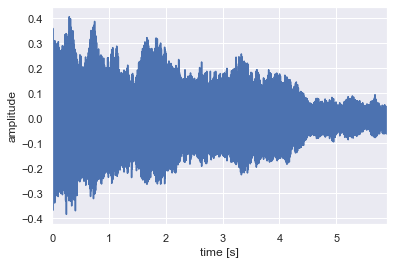

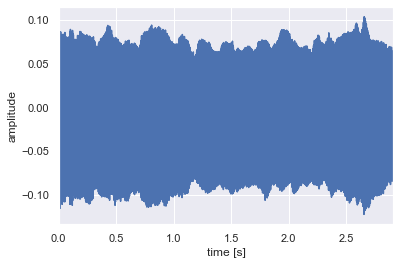

In [18]:
import parselmouth
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ALS
sns.set() # Using seaborn's default style 

# Plot nice figures using Python's "standard" matplotlib library
snd_als = parselmouth.Sound("SPA2019_Pathology_008.wav")
plt.figure()
plt.plot(snd_als.xs(), snd_als.values.T)
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

#Healthy Control
sns.set() # Using seaborn's default style 

# Plot nice figures using Python's "standard" matplotlib library
snd_HC = parselmouth.Sound("SPA2019_Control_002.wav")
plt.figure()
plt.plot(snd_HC.xs(), snd_HC.values.T)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

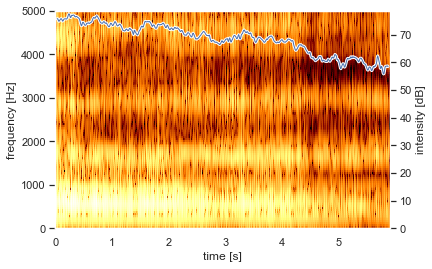

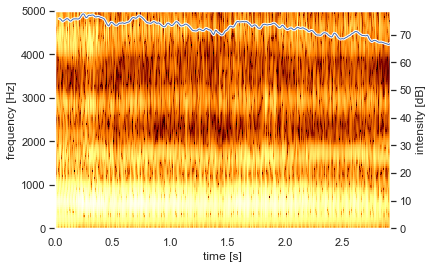

In [31]:
#ALS
def draw_spectrogram_als(spectrogram_als, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_als(intensity_als):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")

#HC
def draw_spectrogram_hc(spectrogram_HC, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = 10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_intensity_hc(intensity_HC):
    plt.plot(intensity.xs(), intensity.values.T, linewidth=3, color='w')
    plt.plot(intensity.xs(), intensity.values.T, linewidth=1)
    plt.grid(False)
    plt.ylim(0)
    plt.ylabel("intensity [dB]")
    
#ALS
intensity_als = snd_als.to_intensity()
spectrogram_als = snd_als.to_spectrogram()
plt.figure()
draw_spectrogram_als(spectrogram_als)
plt.twinx()
draw_intensity_als(intensity_als)
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.show() 

#HC
intensity_HC = snd_HC.to_intensity()
spectrogram_HC = snd_HC.to_spectrogram()
plt.figure()
draw_spectrogram_hc(spectrogram_HC)
plt.twinx()
draw_intensity_hc(intensity_HC)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.show() 

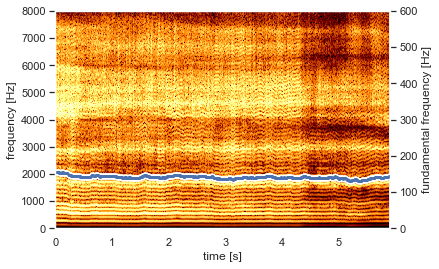

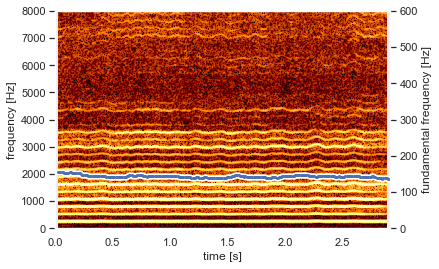

In [33]:
#ALS
def draw_pitch(pitch_als):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_als = snd_als.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd = snd_als.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch_als)
plt.xlim([snd_als.xmin, snd_als.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")

#HC
def draw_pitch(pitch_HC):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

pitch_HC = snd_HC.to_pitch()
# If desired, pre-emphasize the sound fragment before calculating the spectrogram
pre_emphasized_snd_hc = snd_HC.copy()
pre_emphasized_snd_hc.pre_emphasize()
spectrogram = pre_emphasized_snd_hc.to_spectrogram(window_length=0.03, maximum_frequency=8000)
plt.figure()
draw_spectrogram(spectrogram)
plt.twinx()
draw_pitch(pitch_HC)
plt.xlim([snd_HC.xmin, snd_HC.xmax])
plt.show() # or plt.savefig("spectrogram_0.03.pdf")